### Converting a `Functional` model to `Sequential` model during `Transfare` Learning.
* This notebook will walk through on how to convert to `Sequential` from `Functional` API using Transfare leaning.

In [1]:
import tensorflow as tf

### Data Argumentation using `keras api`

In [15]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator

In [16]:
train_path = "bees_v_ant/train"
validation_path = "bees_v_ant/validation"
test_path = '.'

In [17]:
test_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)
train_gen = ImageDataGenerator(rescale=1./255)

In [44]:
test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    classes=["test"]
)
train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    classes=["ant", 'bee'],
    class_mode='categorical',
    batch_size=8,
)
valid_data = valid_gen.flow_from_directory(
    validation_path,
    target_size=(224, 224),
    classes=["ant", 'bee'],
    class_mode='categorical',
    batch_size=8,
)

Found 8 images belonging to 1 classes.
Found 20 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [22]:
test_data[0]

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

> Select the `base` model. `VGG16` with 1000 [class names](https://image-net.org/challenges/LSVRC/2014/browse-synsets)

In [36]:
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model)) # Functional Model
vgg_model.summary()

<class 'tensorflow.python.keras.engine.functional.Functional'>
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
________________________________________________________________

### `VGG16` model achitecture

<p align="center">
    <img src="https://miro.medium.com/max/237/1*Z5jNPTu8Xexp9rRs7RNKbA.png"/>
</p>

It can be ploted using the `plot_model` function from keras as follows:
```python
from keras.applications.vgg16 import VGG16
from keras.utils import  plot_model
model = VGG16()
plot_model(model)
```

> Create a ``sequential`` model instance

In [45]:
model = tf.keras.Sequential()

> Loop through all the `base` model layers and add them to the created `model` model except the output layer.

In [46]:
for layer in vgg_model.layers[0:-1]:
    model.add(layer)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

> Set `trainable=False` for all the model layers, this is because we don't want to train them again.

In [47]:
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

> Add the `last` layers for classification with the number of `classes` that we have.

In [48]:
output_layer = tf.keras.layers.Dense(2, activation='softmax')
model.add(output_layer)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

> Compile the ``model``.

In [49]:
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['acc']
)

> Train the model with your own data by calling `model.fit()`

In [50]:
early_stopping = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss',
    patience=2,
    verbose=0,
)

history = model.fit(
   train_data,
    epochs = 10,
    batch_size = 8,
    validation_data = valid_data,
    verbose = 1,
    callbacks=[early_stopping]
)

Epoch 1/10
3/3 [==============================] - 20s 7s/step - loss: 1.0507 - acc: 0.5000 - val_loss: 0.5677 - val_acc: 0.8333
Epoch 2/10
3/3 [==============================] - 13s 5s/step - loss: 0.5233 - acc: 0.8333 - val_loss: 0.4451 - val_acc: 0.7500
Epoch 3/10
3/3 [==============================] - 13s 6s/step - loss: 0.2652 - acc: 1.0000 - val_loss: 0.2360 - val_acc: 1.0000
Epoch 4/10
3/3 [==============================] - 13s 5s/step - loss: 0.2188 - acc: 1.0000 - val_loss: 0.1662 - val_acc: 1.0000
Epoch 5/10
3/3 [==============================] - 13s 5s/step - loss: 0.1433 - acc: 1.0000 - val_loss: 0.1441 - val_acc: 1.0000
Epoch 6/10
3/3 [==============================] - 13s 6s/step - loss: 0.1130 - acc: 1.0000 - val_loss: 0.1245 - val_acc: 1.0000
Epoch 7/10
3/3 [==============================] - 13s 5s/step - loss: 0.0713 - acc: 1.0000 - val_loss: 0.0545 - val_acc: 1.0000
Epoch 8/10
3/3 [==============================] - 13s 5s/step - loss: 0.0434 - acc: 1.0000 - val_loss: 0

> Plotting the model `history`.

In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

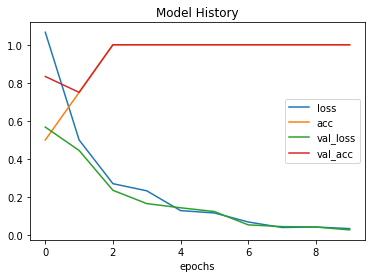

In [54]:
pd.DataFrame(history.history).plot(title="Model History", xlabel="epochs")
plt.show()

> Evaluating the `model`.

In [55]:
model.evaluate(test_data, verbose=1)

1/1 [==============================] - 4s 4s/step - loss: 4.1126 - acc: 0.5000


[4.112575531005859, 0.5]

> Making ``predictions``.

In [59]:
predictions = tf.argmax(model.predict(test_data), axis=1).numpy()
predictions

array([1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [85]:
class_names = np.array(["bee", "ant"])

In [79]:
images = [image for image in test_data[0][0]]

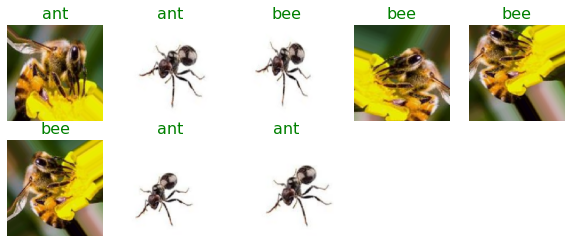

In [86]:
def plot_predictions_images(images_and_classes, labels_pred, cols=5):
  rows = 3
  fig = plt.figure()
  fig.set_size_inches(cols * 2, rows * 2)
  for i, (image, label_pred) in enumerate(zip(images_and_classes, labels_pred)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(class_names[label_pred], color ='g', fontsize=16 )

plot_predictions_images(images[:], predictions[:])